# Capstone Project - Battle of the Neighbourhoods

In [5]:
%pip install BeautifulSoup4
from bs4 import BeautifulSoup
import requests
import numpy as np

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 


from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium  

print('Libraries Imported')

Note: you may need to restart the kernel to use updated packages.
Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries Imported


## Web Scraping Data on the Demographics of Toronto using BeautifulSoup

In [6]:
url='https://en.wikipedia.org/wiki/Demographics_of_Toronto'
url_1 = requests.get(url).text
soup = BeautifulSoup(url_1, "html.parser")
#print(soup.prettify())

In [7]:
table = soup.find_all("table", attrs={"class": "wikitable sortable"})

In [8]:
table1 = table[1]

## Transforming Web Scraped Data on the Demographics of Toronto into a Pandas Data Frame

In [9]:
td_data=[]
for data in table1.find_all('tr'):
    row=[]
    for td in data.find_all('td'):
        row.append(td.text.strip())
    td_data.append(row)

In [10]:
columns=['Top 20 Ethnic origins in the City of Toronto','Population(2016)','Pop. %',
         'Riding with Highest Concentration','Riding Conc. %']
df = pd.DataFrame(td_data, columns=columns)
df=df.drop(df.index[0])
df = df.reset_index(drop=True)
df = df.set_index('Top 20 Ethnic origins in the City of Toronto')
df['Pop. %'] = df['Pop. %'].astype(float)
df=df.drop(df.index[20])
df

,Population(2016),Pop. %,Riding with Highest Concentration,Riding Conc. %
Top 20 Ethnic origins in the City of Toronto,,,,
Chinese,"332,830",12.5,Scarborough—Agincourt,47.0
English,"331,890",12.3,Beaches—East York,24.2
Canadian,"323,175",12.0,Beaches-East York,19.7
Irish,"262,965",9.8,Parkdale—High Park,20.0
Scottish,"256,250",9.5,Beaches—East York,18.9
East Indian,"202,675",7.5,Etobicoke North,22.2
Italian,"182,495",6.8,Etobicoke Centre,15.1
Filipino,"162,605",6.0,York Centre,17.0
German,"130,900",4.9,Parkdale—High Park,9.8


## Data Visualization on the Top 20 Ethnic Origins of Toronto Residents using MatPlotLib

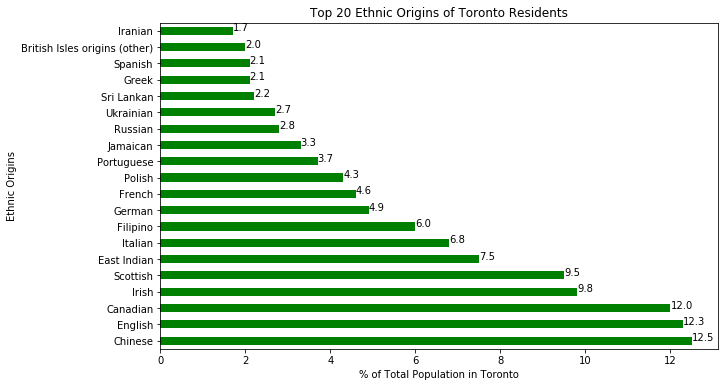

In [12]:
df_plot1=df['Pop. %']
df_plot1.plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('% of Total Population in Toronto')
plt.ylabel('Ethnic Origins')
plt.title('Top 20 Ethnic Origins of Toronto Residents')
for index, value in enumerate(df_plot1):
    plt.text(value, index, str(value))
plt.show()

## Transforming Web Scraped Data on the Demographics of Etobicoke, Toronto into a Pandas Data Frame

In [13]:
table2 = table[8]

In [14]:
td_data2=[]
for data2 in table2.find_all('tr'):
    row2=[]
    for td in data2.find_all('td'):
        row2.append(td.text.strip())
    td_data2.append(row2)

In [15]:
columns2=['Riding','Population','Ethnic Group #1','Highest %','Ethnic Group #2','2nd Highest %',
          'Ethnic Group #3','3rd Highest %',
          'Ethnic Group #4','4th Highest %','Ethnic Group #5','5th Highest %']
df2 = pd.DataFrame(td_data2, columns=columns2)
df2 = df2.drop(df2.index[0])
df2 = df2.set_index('Riding')
df2

,Population,Ethnic Group #1,Highest %,Ethnic Group #2,2nd Highest %,Ethnic Group #3,3rd Highest %,Ethnic Group #4,4th Highest %,Ethnic Group #5,5th Highest %
Riding,,,,,,,,,,,
Etobicoke-Lakeshore,"127,520",White,71.3,South Asian,5.5,Black,5.0,,None,None,None
Etobicoke North,"116,960",South Asian,28.9,White,23.8,Black,23.4,,None,None,None
Etobicoke Centre,"116,055",White,72.3,South Asian,5.9,Black,5.9,,None,None,None
York South-Weston,"115,130",White,44.2,Black,23.2,Latin American,8.5,Filipino,5.9,South Asian,5.7


In [16]:
#Creating new data fron data on Etobicoke North of ease of plotting a bar chart
columns_plot=['Ethnic Group','%']
data_plot={'Ethnic Group':['South Asian','White','Black','Others'],
              '%':[28.9,23.8,23.4,23.9]}
df_plot=pd.DataFrame(data_plot,columns=columns_plot)
df_plot = df_plot.set_index('Ethnic Group')
df_plot

,%
Ethnic Group,
South Asian,28.9
White,23.8
Black,23.4
Others,23.9


## Data Visualization on the Demographics of Etobicoke North Residents using MatPlotLib

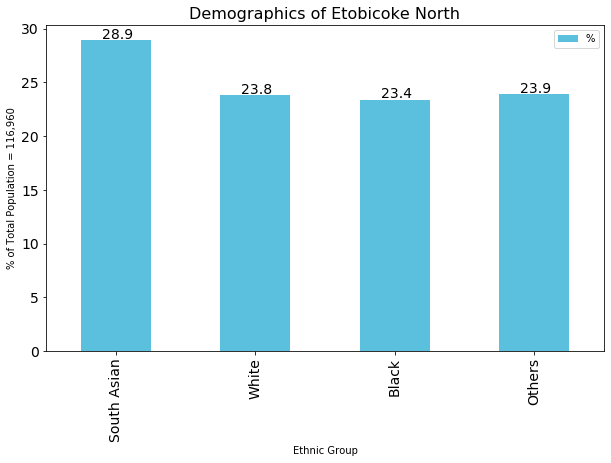

In [17]:
ax = df_plot.plot(kind='bar', figsize=(10, 6), color=['#5bc0de'], fontsize=14)

ax.set_title("Demographics of Etobicoke North", fontsize=16)
ax.set_ylabel('% of Total Population = 116,960')
ax.set_facecolor('white')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.15, p.get_height()+0.15), fontsize=14)

## Exploratory Data Analysis on Etobicoke North using FourSquare API

In [18]:
CLIENT_ID = 'E2GPSWBJOYD5P3O4M5VZQPGWNREM105J0XILAQUQKTCKXNH3'
CLIENT_SECRET = 'FCRQYMB1LUBK3WQHDO4YDKZ3WEXLHFRTGXEW04LE0UUSCEIV'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E2GPSWBJOYD5P3O4M5VZQPGWNREM105J0XILAQUQKTCKXNH3
CLIENT_SECRET:FCRQYMB1LUBK3WQHDO4YDKZ3WEXLHFRTGXEW04LE0UUSCEIV


In [19]:
#using geocoder to determine the coordinates of Etobicoke North
address = 'Etobicoke North, Toronto'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.7410925 -79.5892249


In [20]:
#search for Indian restaurants in a 5000m radius of Etobicoke North
search_query ='indian'
radius = 5000
print(search_query + ' .... OK!')

indian .... OK!


In [21]:
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [22]:
results = requests.get(url2).json()

In [23]:
venues = results['response']['venues'] # assign relevant part of JSON to venues
df3 = json_normalize(venues) # tranform venues into a dataframe
df3

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,543059a0498e6631c106d6c4,Green's West Indian Groceries,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",v-1591841498,False,11 Westmore Drive,43.742800,-79.603700,"[{'label': 'display', 'lat': 43.7428, 'lng': -...",1179,M9V 3Y6,CA,Etobicoke,ON,Canada,"[11 Westmore Drive, Etobicoke ON M9V 3Y6, Canada]",NaN
1,4fc15c57e4b0d3da59028b33,Indian Line Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1591841498,False,NaN,43.726021,-79.622084,"[{'label': 'display', 'lat': 43.7260213949842,...",3130,NaN,CA,NaN,NaN,Canada,[Canada],NaN
2,5ccf00698fb09e002c2a5910,Indian Vedic Astrologer Yoga Krishna - Best Ps...,"[{'id': '52f2ab2ebcbc57f1066b8b43', 'name': 'A...",v-1591841498,False,2487 finch Ave west,43.749306,-79.553490,"[{'label': 'display', 'lat': 43.749306, 'lng':...",3015,M9M 2G1,CA,Toronto,ON,Canada,[2487 finch Ave west (Finch and Milvan interse...,Finch and Milvan intersection
3,5a2f7438a3061971ddcf065d,"Master Rishi Guruji, Best Indian Astrologer in...","[{'id': '52f2ab2ebcbc57f1066b8b43', 'name': 'A...",v-1591841498,False,2654 Islington ave,43.738391,-79.566432,"[{'label': 'display', 'lat': 43.73839088504633...",1857,M9V 2X5,CA,Toronto,ON,Canada,"[2654 Islington ave, Toronto ON M9V 2X5, Canada]",NaN
4,515dfec1e4b0a90e62a40e7f,Large Indian Buffet,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1591841498,False,NaN,43.738283,-79.566449,"[{'label': 'display', 'lat': 43.738283, 'lng':...",1858,NaN,CA,NaN,NaN,Canada,[Canada],NaN
5,5160aaace4b05eefc1390a60,Great Indian Buffet,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1591841498,False,NaN,43.738136,-79.566281,"[{'label': 'display', 'lat': 43.738136, 'lng':...",1874,NaN,CA,NaN,NaN,Canada,[Canada],NaN
6,4fb18619e4b03ad0edbbce3d,Albion Indian Bazaar,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",v-1591841498,False,NaN,43.738279,-79.565253,"[{'label': 'display', 'lat': 43.73827875855427...",1953,NaN,CA,NaN,NaN,Canada,[Canada],NaN
7,4c517481375c0f4782c9fb93,Indian Line Campground,"[{'id': '4bf58dd8d48988d1e4941735', 'name': 'C...",v-1591841498,False,7625 Finch Ave. W.,43.736025,-79.635229,"[{'label': 'display', 'lat': 43.73602514174968...",3742,L6T 0B2,CA,Brampton,ON,Canada,"[7625 Finch Ave. W., Brampton ON L6T 0B2, Canada]",NaN
8,4df24f1b88772e1f814f40d3,Exotic indian cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1591841498,False,1850 Albion Road unit 13,43.745956,-79.615838,"[{'label': 'display', 'lat': 43.74595639589435...",2207,M9W 5T2,CA,Toronto,ON,Canada,"[1850 Albion Road unit 13, Toronto ON M9W 5T2,...",NaN
9,4ea3279f0aaf711180ecc3ef,Indian Motorcycle,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1591841498,False,NaN,43.780273,-79.589016,"[{'label': 'display', 'lat': 43.78027335940552...",4361,NaN,CA,Vaughan,ON,Canada,"[Vaughan ON, Canada]",NaN


In [24]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df3.columns if col.startswith('location.')] + ['id']
dataframe_filtered = df3.loc[:, filtered_columns]

def get_category_type(row): # function that extracts the category of the venue
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Green's West Indian Groceries,Food & Drink Shop,11 Westmore Drive,43.742800,-79.603700,"[{'label': 'display', 'lat': 43.7428, 'lng': -...",1179,M9V 3Y6,CA,Etobicoke,ON,Canada,"[11 Westmore Drive, Etobicoke ON M9V 3Y6, Canada]",NaN,543059a0498e6631c106d6c4
1,Indian Line Park,Park,NaN,43.726021,-79.622084,"[{'label': 'display', 'lat': 43.7260213949842,...",3130,NaN,CA,NaN,NaN,Canada,[Canada],NaN,4fc15c57e4b0d3da59028b33
2,Indian Vedic Astrologer Yoga Krishna - Best Ps...,Astrologer,2487 finch Ave west,43.749306,-79.553490,"[{'label': 'display', 'lat': 43.749306, 'lng':...",3015,M9M 2G1,CA,Toronto,ON,Canada,[2487 finch Ave west (Finch and Milvan interse...,Finch and Milvan intersection,5ccf00698fb09e002c2a5910
3,"Master Rishi Guruji, Best Indian Astrologer in...",Astrologer,2654 Islington ave,43.738391,-79.566432,"[{'label': 'display', 'lat': 43.73839088504633...",1857,M9V 2X5,CA,Toronto,ON,Canada,"[2654 Islington ave, Toronto ON M9V 2X5, Canada]",NaN,5a2f7438a3061971ddcf065d
4,Large Indian Buffet,Indian Restaurant,NaN,43.738283,-79.566449,"[{'label': 'display', 'lat': 43.738283, 'lng':...",1858,NaN,CA,NaN,NaN,Canada,[Canada],NaN,515dfec1e4b0a90e62a40e7f
5,Great Indian Buffet,Indian Restaurant,NaN,43.738136,-79.566281,"[{'label': 'display', 'lat': 43.738136, 'lng':...",1874,NaN,CA,NaN,NaN,Canada,[Canada],NaN,5160aaace4b05eefc1390a60
6,Albion Indian Bazaar,Shopping Mall,NaN,43.738279,-79.565253,"[{'label': 'display', 'lat': 43.73827875855427...",1953,NaN,CA,NaN,NaN,Canada,[Canada],NaN,4fb18619e4b03ad0edbbce3d
7,Indian Line Campground,Campground,7625 Finch Ave. W.,43.736025,-79.635229,"[{'label': 'display', 'lat': 43.73602514174968...",3742,L6T 0B2,CA,Brampton,ON,Canada,"[7625 Finch Ave. W., Brampton ON L6T 0B2, Canada]",NaN,4c517481375c0f4782c9fb93
8,Exotic indian cuisine,Indian Restaurant,1850 Albion Road unit 13,43.745956,-79.615838,"[{'label': 'display', 'lat': 43.74595639589435...",2207,M9W 5T2,CA,Toronto,ON,Canada,"[1850 Albion Road unit 13, Toronto ON M9W 5T2,...",NaN,4df24f1b88772e1f814f40d3
9,Indian Motorcycle,Building,NaN,43.780273,-79.589016,"[{'label': 'display', 'lat': 43.78027335940552...",4361,NaN,CA,Vaughan,ON,Canada,"[Vaughan ON, Canada]",NaN,4ea3279f0aaf711180ecc3ef


In [25]:
#filter data frame to for only catagories data listed as Indian Restaurant
df_filtered=dataframe_filtered[dataframe_filtered['categories']=='Indian Restaurant']

In [26]:
#filter data frame to include only data on name, catagories, lat, lng, city & id
df_filtered = df_filtered.loc[:,('name','categories','lat','lng','city','id')]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered

,name,categories,lat,lng,city,id
0,Large Indian Buffet,Indian Restaurant,43.738283,-79.566449,NaN,515dfec1e4b0a90e62a40e7f
1,Great Indian Buffet,Indian Restaurant,43.738136,-79.566281,NaN,5160aaace4b05eefc1390a60
2,Exotic indian cuisine,Indian Restaurant,43.745956,-79.615838,Toronto,4df24f1b88772e1f814f40d3
3,Family Indian Cuisine,Indian Restaurant,43.716122,-79.555331,Etobicoke,4e6155c97d8b8540892c9de7
4,Bajra Fine Indian Cuisine,Indian Restaurant,43.751894,-79.535493,Toronto,5e0d270af1a09700089d3260


In [27]:
#Using GET to search for the rating of the restaurant based on the ID
venue_id_0 = '515dfec1e4b0a90e62a40e7f' # ID of Large Indian Buffet
url_id_0 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id_0, CLIENT_ID, CLIENT_SECRET, VERSION)
result_id_0 = requests.get(url_id_0).json()

try:
    print(result_id_0['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [28]:
#Using GET to search for the rating of the restaurant based on the ID
venue_id_1 = '5160aaace4b05eefc1390a60' # ID of Great Indian Buffet
url_id_1 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id_1, CLIENT_ID, CLIENT_SECRET, VERSION)
result_id_1 = requests.get(url_id_1).json()

try:
    print(result_id_1['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [29]:
#Using GET to search for the rating of the restaurant based on the ID
venue_id_2 = '4df24f1b88772e1f814f40d3' # ID of Exotic Indian Cuisine
url_id_2 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id_2, CLIENT_ID, CLIENT_SECRET, VERSION)
result_id_2 = requests.get(url_id_2).json()

try:
    print(result_id_2['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [30]:
#Using GET to search for the rating of the restaurant based on the ID
venue_id_3 = '4e6155c97d8b8540892c9de7' # ID of Family Indian Restaurant
url_id_3 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id_3, CLIENT_ID, CLIENT_SECRET, VERSION)
result_id_3 = requests.get(url_id_3).json()

try:
    print(result_id_3['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [31]:
#Using GET to search for the rating of the restaurant based on the ID
venue_id_4 = '5e0d270af1a09700089d3260' # ID of Bajra Fine Indian Cuisine
url_id_4 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id_4, CLIENT_ID, CLIENT_SECRET, VERSION)
result_id_4 = requests.get(url_id_4).json()

try:
    print(result_id_4['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [32]:
#search for cinemas in a 5000m radius of Etobicoke North
search_query2 ='Cinema'
radius = 5000
print(search_query2 + ' .... OK!')

Cinema .... OK!


In [33]:
url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query2, radius, LIMIT)

In [34]:
results3 = requests.get(url3).json()

In [35]:
venues1 = results3['response']['venues'] # assign relevant part of JSON to venues1
df4 = json_normalize(venues1) # tranform venues1 into a dataframe
df4

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4ca8ae6e76d3a0935125186b,Albion Cinemas,"[{'id': '4bf58dd8d48988d17e941735', 'name': 'I...",v-1591841546,False,1530 Albion Road,Kipling Ave,43.741940,-79.584988,"[{'label': 'display', 'lat': 43.74194030376191...",353,M9V 1B4,CA,Toronto,ON,Canada,"[1530 Albion Road (Kipling Ave), Toronto ON M9..."
1,4bd61bc96798ef3b519e648d,Rainbow Cinema Woodbine,"[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",v-1591841546,False,500 Rexdale Blvd.,at Hwy 27 (Woodbine Centre),43.720125,-79.600789,"[{'label': 'display', 'lat': 43.72012487834608...",2512,M9W 6K5,CA,Etobicoke,ON,Canada,[500 Rexdale Blvd. (at Hwy 27 (Woodbine Centre...
2,4c88437997828cfa56ec9aaa,Rainbow Cinemas,"[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",v-1591841546,False,500 Rexdale Avenue,NaN,43.726361,-79.574516,"[{'label': 'display', 'lat': 43.726361, 'lng':...",2022,NaN,CA,Etobicoke,ON,Canada,"[500 Rexdale Avenue, Etobicoke ON, Canada]"


In [36]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns1 = ['name', 'categories'] + [col for col in df4.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = df4.loc[:, filtered_columns]
# filter the category for each row
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]
dataframe_filtered1

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Albion Cinemas,Indie Movie Theater,1530 Albion Road,43.741940,-79.584988,"[{'label': 'display', 'lat': 43.74194030376191...",353,M9V 1B4,CA,Toronto,ON,Canada,"[1530 Albion Road (Kipling Ave), Toronto ON M9...",Kipling Ave,4ca8ae6e76d3a0935125186b
1,Rainbow Cinema Woodbine,Movie Theater,500 Rexdale Blvd.,43.720125,-79.600789,"[{'label': 'display', 'lat': 43.72012487834608...",2512,M9W 6K5,CA,Etobicoke,ON,Canada,[500 Rexdale Blvd. (at Hwy 27 (Woodbine Centre...,at Hwy 27 (Woodbine Centre),4bd61bc96798ef3b519e648d
2,Rainbow Cinemas,Movie Theater,500 Rexdale Avenue,43.726361,-79.574516,"[{'label': 'display', 'lat': 43.726361, 'lng':...",2022,NaN,CA,Etobicoke,ON,Canada,"[500 Rexdale Avenue, Etobicoke ON, Canada]",NaN,4c88437997828cfa56ec9aaa


In [37]:
#filter data frame to include only data on name, catagories, lat, lng, city & id
df_filtered1 = dataframe_filtered1.loc[:,('name','categories','lat','lng','city','id')]
df_filtered1 = df_filtered1.reset_index(drop=True)
df_filtered1

,name,categories,lat,lng,city,id
0,Albion Cinemas,Indie Movie Theater,43.741940,-79.584988,Toronto,4ca8ae6e76d3a0935125186b
1,Rainbow Cinema Woodbine,Movie Theater,43.720125,-79.600789,Etobicoke,4bd61bc96798ef3b519e648d
2,Rainbow Cinemas,Movie Theater,43.726361,-79.574516,Etobicoke,4c88437997828cfa56ec9aaa


In [38]:
#create seperate data frames for both Rainbow Cinemas and Albion Cinemas for ease of plotting markers using Folium
df_albion=df_filtered1.iloc[[0]]
df_rainbow=df_filtered1.iloc[[1,2]]

In [39]:
#Using GET to search for the rating of Albion Cinemas based on the ID
venue_id_c = '4ca8ae6e76d3a0935125186b' # Albion Cinemas
url_id_c = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id_c, CLIENT_ID, CLIENT_SECRET, VERSION)
result_id_c = requests.get(url_id_c).json()

try:
    print(result_id_c['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.1


In [40]:
result_id_c['response']['venue']['tips']['count'] #Using GET to search for number of tips for Albion Cinemas

4

In [41]:
limit_tip = 10
url_tip = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id_c, CLIENT_ID, CLIENT_SECRET, VERSION, limit_tip)

results_tip = requests.get(url_tip).json()
#results_tip

In [42]:
tips = results_tip['response']['tips']['items'] # assign relevant part of JSON to tips
tips_df = json_normalize(tips) # tranform tips into a dataframe
#filter data frame based on column data on id, text, agreeCount & like.count
tips_df_filtered=tips_df[['id','text','agreeCount','likes.count']]
tips_df_filtered

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,text,agreeCount,likes.count
0,4ef6a0896da1f7b6606ecc70,Expect an authentic Indian movie viewing exper...,1,1


## Data Visualization of all Locations of Interest using Folium

In [44]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12.45) # generate map centred around Etobicoke North

# add a red circle to represent the search radius of Etobicoke North
folium.features.Circle(
    [latitude, longitude],
    radius=5000,
    color='red',
    popup='Etobicoke North',
    fill = True,
    fill_color = 'white',
    fill_opacity = 0.1
).add_to(venues_map)

# add a blue markers to represent the location of the Indian Restaurants
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# add a green markers to represent the location of the Rainbow Cinemas    
for lat, lng, label in zip(df_rainbow.lat, df_rainbow.lng, df_rainbow.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)   

# add a green markers to represent the location of Albion Cinema     
for lat, lng, label in zip(df_albion.lat, df_albion.lng, df_albion.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(venues_map)
    
venues_map